In [19]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
from sklearn import metrics
%matplotlib inline



In [2]:
run_id = 1

def get_metrics_table(run_id=run_id):
    dfs = []
    for file in os.listdir(f'results/{run_id}/'):
        if 'metrics' in file:
            curr_df = pd.read_csv(f'results/{run_id}/{file}')
            curr_df['lamda'] = file.split('_')[1][:-4]
            dfs.append(curr_df)
    return pd.concat(dfs)

def get_predicts_table(run_id=run_id):
    dfs = []
    for file in os.listdir(f'results/{run_id}/'):
        if 'test_predict' in file:
            curr_df = pd.read_csv(f'results/{run_id}/{file}')
            curr_df[file[:-4]] = curr_df.test_y_pred
            dfs.append(curr_df[file[:-4]])
    dfs.append(curr_df.test_y_true)
    return pd.concat(dfs,axis=1)
    

In [72]:
rnid = 4
results_df = get_metrics_table(rnid)
results_df[results_df.phase=='test'].sort_values('_f1_score',ascending=False)

,_loss,_accuracy,_ones_ratio,_f1_score,_precision_score,_recall_score,_roc_auc_score,phase,_lamda,lamda
2,0.246778,0.895988,0.087667,0.495192,0.581921,0.430962,0.694695,test,0.12376,ce
2,0.094303,0.777613,0.290243,0.455758,0.320819,0.786611,0.781508,test,0.12376,wce
2,0.130100,0.897969,0.066865,0.449198,0.622222,0.351464,0.661406,test,0.36000,0.36
2,0.128010,0.897474,0.059435,0.423398,0.633333,0.317992,0.646636,test,0.45000,0.45
2,0.122609,0.896483,0.054482,0.401146,0.636364,0.292887,0.635208,test,0.55000,0.55
2,0.135228,0.887073,0.053987,0.344828,0.550459,0.251046,0.611759,test,0.27000,0.27
2,0.128351,0.882120,0.058940,0.335196,0.504202,0.251046,0.608950,test,0.18000,0.18
2,0.111623,0.893016,0.042100,0.333333,0.635294,0.225941,0.604263,test,0.64000,0.64
2,0.122880,0.881625,0.046558,0.282282,0.500000,0.196653,0.585124,test,0.12376,0.1237595955813518
2,0.083770,0.882615,0.035661,0.237942,0.513889,0.154812,0.567574,test,0.00000,0.0


<AxesSubplot:ylabel='lamda'>

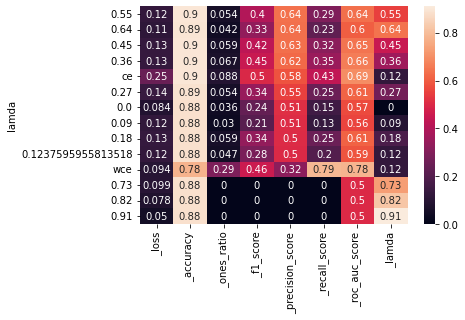

In [95]:
plot_df = results_df[results_df.phase=='test'].sort_values('_precision_score',ascending=False).drop('phase',axis=1).set_index('lamda')
sns.heatmap(plot_df, annot=True)

<AxesSubplot:ylabel='lamda'>

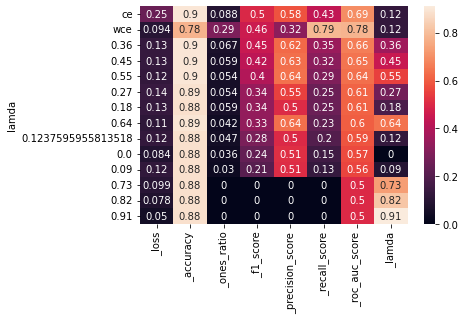

In [73]:
plot_df = results_df[results_df.phase=='test'].sort_values('_f1_score',ascending=False).drop('phase',axis=1).set_index('lamda')
sns.heatmap(plot_df, annot=True)

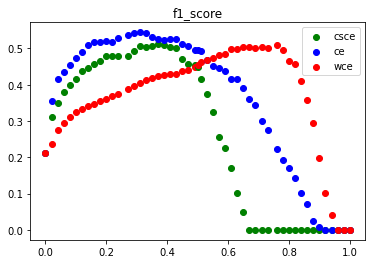

In [74]:
pred_df = get_predicts_table(rnid)
pred_df = pred_df[['test_predict_0.36','test_predict_ce','test_predict_wce','test_y_true']]

exp_range = list(np.linspace(0,1,50).round(2))

for th in exp_range:
    plt.scatter(th,metrics.f1_score(pred_df.test_y_true,pred_df[['test_predict_0.36']] > th),c='green')
    plt.scatter(th,metrics.f1_score(pred_df.test_y_true,pred_df[['test_predict_ce']] > th),c='blue')
    plt.scatter(th,metrics.f1_score(pred_df.test_y_true,pred_df[['test_predict_wce']] > th),c='red')
    
plt.scatter(0.5,metrics.f1_score(pred_df.test_y_true,pred_df[['test_predict_0.36']] > 0.5),c='green',label='csce')
plt.scatter(0.5,metrics.f1_score(pred_df.test_y_true,pred_df[['test_predict_ce']] > 0.5),c='blue',label='ce')
plt.scatter(0.5,metrics.f1_score(pred_df.test_y_true,pred_df[['test_predict_wce']] > 0.5),c='red',label='wce')
plt.legend()
plt.title('f1_score')
plt.show()

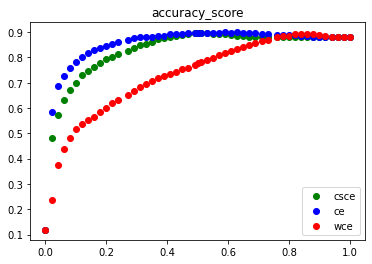

In [75]:
met = metrics.accuracy_score
for th in exp_range:
    plt.scatter(th,met(pred_df.test_y_true,pred_df[['test_predict_0.36']] > th),c='green')
    plt.scatter(th,met(pred_df.test_y_true,pred_df[['test_predict_ce']] > th  ),c='blue')
    plt.scatter(th,met(pred_df.test_y_true,pred_df[['test_predict_wce']] > th ),c='red')
    
plt.scatter(0.5,met(pred_df.test_y_true,pred_df[['test_predict_0.36']] > 0.5),c='green',label='csce')
plt.scatter(0.5,met(pred_df.test_y_true,pred_df[['test_predict_ce']] > 0.5  ),c='blue',label='ce')
plt.scatter(0.5,met(pred_df.test_y_true,pred_df[['test_predict_wce']] > 0.5 ),c='red',label='wce')
plt.legend()
plt.title('accuracy_score')
plt.show()

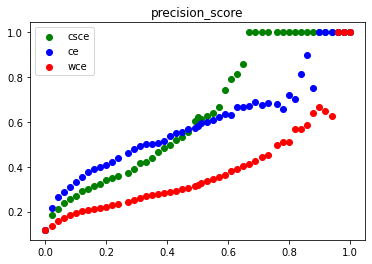

In [94]:
met = metrics.precision_score
for th in exp_range:
    plt.scatter(th,met(pred_df.test_y_true,pred_df[['test_predict_0.36']] > th,zero_division=1 ),c='green')
    plt.scatter(th,met(pred_df.test_y_true,pred_df[['test_predict_ce']] > th ,zero_division =1 ),c='blue')
    plt.scatter(th,met(pred_df.test_y_true,pred_df[['test_predict_wce']] > th ,zero_division =1),c='red')
    
plt.scatter(0.5,met(pred_df.test_y_true,pred_df[['test_predict_0.36']] > 0.5),c='green',label='csce')
plt.scatter(0.5,met(pred_df.test_y_true,pred_df[['test_predict_ce']] > 0.5  ),c='blue',label='ce')
plt.scatter(0.5,met(pred_df.test_y_true,pred_df[['test_predict_wce']] > 0.5 ),c='red',label='wce')
plt.legend()
plt.title('precision_score')

plt.show()

test_y_true
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: test_predict_0.36, dtype: object

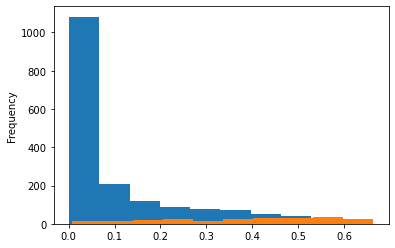

In [90]:
pred_df.groupby('test_y_true')['test_predict_0.36'].plot.hist()

test_y_true
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: test_predict_wce, dtype: object

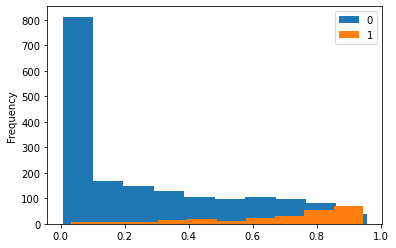

In [91]:
pred_df.groupby('test_y_true')['test_predict_wce'].plot.hist(legend=True)

test_y_true
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: test_predict_ce, dtype: object

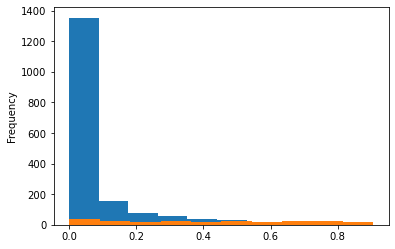

In [88]:
pred_df.groupby('test_y_true')['test_predict_ce'].plot.hist()

In [82]:
pred_df.test_y_true.value_counts()

0    1780
1     239
Name: test_y_true, dtype: int64

In [84]:
np.sum(pred_df[['test_predict_0.36']] > 0.6)

test_predict_0.36    36
dtype: int64

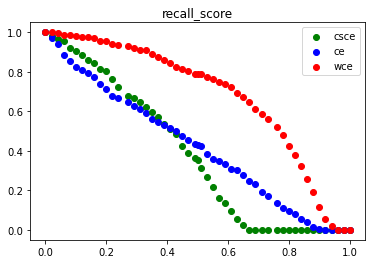

In [77]:
met = metrics.recall_score
for th in exp_range:
    plt.scatter(th,met(pred_df.test_y_true,pred_df[['test_predict_0.36']] > th),c='green')
    plt.scatter(th,met(pred_df.test_y_true,pred_df[['test_predict_ce']] > th  ),c='blue')
    plt.scatter(th,met(pred_df.test_y_true,pred_df[['test_predict_wce']] > th ),c='red')
    
plt.scatter(0.5,met(pred_df.test_y_true,pred_df[['test_predict_0.36']] > 0.5),c='green',label='csce')
plt.scatter(0.5,met(pred_df.test_y_true,pred_df[['test_predict_ce']] > 0.5  ),c='blue',label='ce')
plt.scatter(0.5,met(pred_df.test_y_true,pred_df[['test_predict_wce']] > 0.5 ),c='red',label='wce')
plt.legend()
plt.title('recall_score')

plt.show()

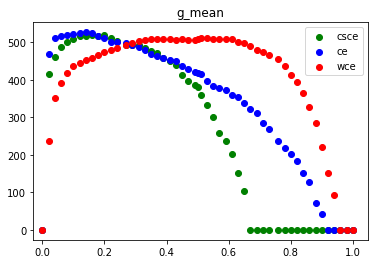

In [78]:
def g_mean(y_tru,y_pred):
    conf_met = metrics.confusion_matrix(y_tru,y_pred)
    tp,tn,fp,fn = conf_met[1,1],conf_met[0,0],conf_met[0,1],conf_met[1,0]   
    return np.sqrt(tp*tn)


met = g_mean
for th in exp_range:
    plt.scatter(th,met(pred_df.test_y_true,pred_df[['test_predict_0.36']] > th),c='green')
    plt.scatter(th,met(pred_df.test_y_true,pred_df[['test_predict_ce']] > th  ),c='blue')
    plt.scatter(th,met(pred_df.test_y_true,pred_df[['test_predict_wce']] > th ),c='red')
    
plt.scatter(0.5,met(pred_df.test_y_true,pred_df[['test_predict_0.36']] > 0.5),c='green',label='csce')
plt.scatter(0.5,met(pred_df.test_y_true,pred_df[['test_predict_ce']] > 0.5  ),c='blue',label='ce')
plt.scatter(0.5,met(pred_df.test_y_true,pred_df[['test_predict_wce']] > 0.5 ),c='red',label='wce')
plt.legend()
plt.title('g_mean')

plt.show()

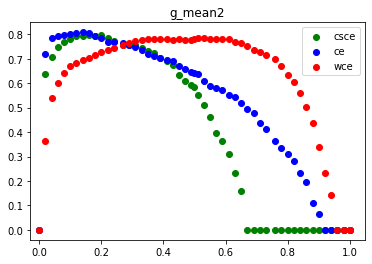

In [80]:
def g_mean2(y_tru,y_pred):
    conf_met = metrics.confusion_matrix(y_tru,y_pred)
    tp,tn,fp,fn = conf_met[1,1],conf_met[0,0],conf_met[0,1],conf_met[1,0] 
    
    SE = tp/(tp+fn)
    SP = tn/(tn+fp)  
    return np.sqrt(SE*SP)


met = g_mean2
for th in exp_range:
    plt.scatter(th,met(pred_df.test_y_true,pred_df[['test_predict_0.36']] > th),c='green')
    plt.scatter(th,met(pred_df.test_y_true,pred_df[['test_predict_ce']] > th  ),c='blue')
    plt.scatter(th,met(pred_df.test_y_true,pred_df[['test_predict_wce']] > th ),c='red')
    
plt.scatter(0.5,met(pred_df.test_y_true,pred_df[['test_predict_0.36']] > 0.5),c='green',label='csce')
plt.scatter(0.5,met(pred_df.test_y_true,pred_df[['test_predict_ce']] > 0.5  ),c='blue',label='ce')
plt.scatter(0.5,met(pred_df.test_y_true,pred_df[['test_predict_wce']] > 0.5 ),c='red',label='wce')
plt.legend()
plt.title('g_mean2')

plt.show()

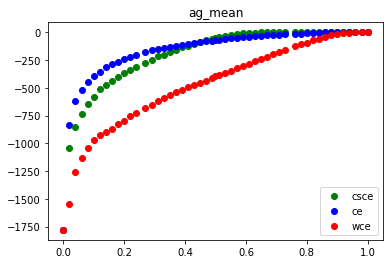

In [81]:
def ag_mean(y_tru,y_pred):
    conf_met = metrics.confusion_matrix(y_tru,y_pred)
    tp,tn,fp,fn = conf_met[1,1],conf_met[0,0],conf_met[0,1],conf_met[1,0] 
    
    SE = tp/(tp+fn)
    SP = tn/(tn+fp)  
    return np.sqrt(SE*SP) - (1-SP)*(tn+fp)


met = ag_mean
for th in exp_range:
    plt.scatter(th,met(pred_df.test_y_true,pred_df[['test_predict_0.36']] > th),c='green')
    plt.scatter(th,met(pred_df.test_y_true,pred_df[['test_predict_ce']] > th  ),c='blue')
    plt.scatter(th,met(pred_df.test_y_true,pred_df[['test_predict_wce']] > th ),c='red')
    
plt.scatter(0.5,met(pred_df.test_y_true,pred_df[['test_predict_0.36']] > 0.5),c='green',label='csce')
plt.scatter(0.5,met(pred_df.test_y_true,pred_df[['test_predict_ce']] > 0.5  ),c='blue',label='ce')
plt.scatter(0.5,met(pred_df.test_y_true,pred_df[['test_predict_wce']] > 0.5 ),c='red',label='wce')
plt.legend()
plt.title('ag_mean')

plt.show()

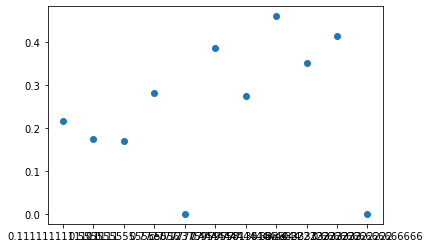

In [29]:
test_Data = results_df[results_df.phase=='test']
plt.scatter(test_Data.lamda,test_Data._f1_score)